Set up the environment.

In [1]:
import pandas as pd
import statsmodels.formula.api as smf

Load the data.

In [2]:
data = pd.read_csv('https://github.com/poposoto/Programming-Assignments/blob/master/Introduction%20to%20Econometrics/str.csv?raw=true')
y = data.score
x1 = data.strat
x2 = data.exppup
x3 = data.eng

The multiple regression model, i.e.,
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + u$.

In [3]:
model = smf.ols('y ~ x1 + x2 + x3', data).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     107.4
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           1.68e-51
Time:                        22:37:50   Log-Likelihood:                -1712.8
No. Observations:                 420   AIC:                             3434.
Df Residuals:                     416   BIC:                             3450.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    649.5814     15.207     42.717      0.000     619.690     679.473
x1            -0.2861      0.481     -0.595      0.552      -1.231       0.658
x2             0.0039      0.001      2.738      0.006       0.001       0.007
x3            -0.6560      0.039    -16.771      0.000      -0.733      -0.579
==============================================================================
Omnibus:                        0.044   Durbin-Watson:                   0.742
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.069
Skew:                          -0.025   Prob(JB):                        0.966
Kurtosis:                       2.961   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Step 1 in Appendix 6.3, i.e.,
$x_1 = \beta_{10} + \beta_{12} x_2 + \beta_{13} x_3 + \tilde{x}_1$.

In [4]:
model1 = smf.ols('x1 ~ x2 + x3', data).fit()
display(model1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     x1   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     141.9
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           9.63e-48
Time:                        22:37:51   Log-Likelihood:                -754.19
No. Observations:                 420   AIC:                             1514.
Df Residuals:                     417   BIC:                             1527.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0710      0.612     47.494      0.000      27.868      30.274
x2            -0.0018      0.000    -16.099      0.000      -0.002      -0.002
x3             0.0149      0.004      3.807      0.000       0.007       0.023
==============================================================================
Omnibus:                        2.010   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.366   Jarque-Bera (JB):                1.873
Skew:                           0.073   Prob(JB):                        0.392
Kurtosis:                       3.293   Cond. No.                     4.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Step 2 in Appendix 6.3, i.e.,
$y = \beta_{y0} + \beta_{y2} x_2 + \beta_{y3} x_3 + \tilde{y}$.

In [5]:
model2 = smf.ols('y ~ x2 + x3', data).fit()
display(model2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     161.2
Date:                Fri, 06 Dec 2019   Prob (F-statistic):           1.40e-52
Time:                        22:37:51   Log-Likelihood:                -1713.0
No. Observations:                 420   AIC:                             3432.
Df Residuals:                     417   BIC:                             3444.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    641.2637      6.002    106.844      0.000     629.466     653.061
x2             0.0044      0.001      3.959      0.000       0.002       0.007
x3            -0.6602      0.038    -17.185      0.000      -0.736      -0.585
==============================================================================
Omnibus:                        0.036   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.982   Jarque-Bera (JB):                0.050
Skew:                          -0.022   Prob(JB):                        0.975
Kurtosis:                       2.969   Cond. No.                     4.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Step 3 in Appendix 6.3, i.e.,
$\tilde{y} = \tilde{\beta}_{0} + \tilde{\beta}_{1} \tilde{x}_1+ \tilde{u}$.

In [6]:
resid = pd.DataFrame({'x1_tilde': model1.resid, 'y_tilde': model2.resid})
model3 = smf.ols('y_tilde ~ x1_tilde', resid).fit()
display(model3.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_tilde   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3562
Date:                Fri, 06 Dec 2019   Prob (F-statistic):              0.551
Time:                        22:37:51   Log-Likelihood:                -1712.8
No. Observations:                 420   AIC:                             3430.
Df Residuals:                     418   BIC:                             3438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.555e-14      0.699   1.08e-13      1.000      -1.373       1.373
x1_tilde      -0.2861      0.479     -0.597      0.551      -1.228       0.656
==============================================================================
Omnibus:                        0.044   Durbin-Watson:                   0.742
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.069
Skew:                          -0.025   Prob(JB):                        0.966
Kurtosis:                       2.961   Cond. No.                         1.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note that by Step 1~3, we have

$$
\begin{cases}
x_1 = \beta_{10} + \beta_{12} x_2 + \beta_{13} x_3 + \tilde{x}_1,\\
y = \beta_{y0} + \beta_{y2} x_2 + \beta_{y3} x_3 + \tilde{y},\\
\tilde{y} = \tilde{\beta}_{0} + \tilde{\beta}_{1} \tilde{x}_1+ \tilde{u}.
\end{cases}
$$

Write $y$ as a function of $x_1$, $x_2$, $x_3$ and $\tilde{u}$, then

$$
y = (\beta_{y0} + \tilde{\beta}_{0} - \beta_{10} \tilde{\beta}_{1})
+ \tilde{\beta}_{1} x_1
+ (\beta_{y2} - \beta_{12} \tilde{\beta}_{1}) x_2
+ (\beta_{y3} - \beta_{13} \tilde{\beta}_{1}) x_3
+ \tilde{u}.
$$

On the other hand, by multiple regression model,

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + u.
$$

So,

$$
\begin{cases}
\beta_0 = \beta_{y0} + \tilde{\beta}_{0} - \beta_{10} \tilde{\beta}_{1},\\
\beta_1 = \tilde{\beta}_{1},\\
\beta_2 = \beta_{y2} - \beta_{12} \tilde{\beta}_{1},\\
\beta_3 = \beta_{y3} - \beta_{13} \tilde{\beta}_{1},\\
u = \tilde{u}.
\end{cases}
$$

Moreover,

$$
\begin{cases}
\hat{\beta}_0 = \hat{\beta}_{y0} + \hat{\tilde{\beta}}_{0} - \hat{\beta}_{10} \hat{\tilde{\beta}}_{1},\\
\hat{\beta}_1 = \hat{\tilde{\beta}}_{1},\\
\hat{\beta}_2 = \hat{\beta}_{y2} - \hat{\beta}_{12} \hat{\tilde{\beta}}_{1},\\
\hat{\beta}_3 = \hat{\beta}_{y3} - \hat{\beta}_{13} \hat{\tilde{\beta}}_{1},\\
\hat{u} = \hat{\tilde{u}}.
\end{cases}
$$

In [7]:
beta10, beta12, beta13 = model1.params
betay0, betay2, betay3 = model2.params
beta0_tilde, beta1_tilde = model3.params
RighHandSide = [betay0 + beta0_tilde - beta10 * beta1_tilde,
                beta1_tilde,
                betay2 - beta12 * beta1_tilde,
                betay3 - beta13 * beta1_tilde]
compare_coef = pd.DataFrame({'LeftHandSide': model.params, 'RighHandSide': RighHandSide})
display(compare_coef)

,LeftHandSide,RighHandSide
Intercept,649.581422,649.581422
x1,-0.286117,-0.286117
x2,0.003867,0.003867
x3,-0.655976,-0.655976


In [8]:
compare_u = pd.DataFrame({'u_hat': model.resid, 'u_tilde_hat': model3.resid})
display(compare_u)

,u_hat,u_tilde_hat
0,21.645983,21.645983
1,1.075127,1.075127
2,-2.228351,-2.228351
3,-24.378347,-24.378347
4,-14.569514,-14.569514
5,-51.299789,-51.299789
6,-12.450273,-12.450273
7,-21.430582,-21.430582
8,-32.340515,-32.340515
9,-23.966034,-23.966034


From the system of equations
$$
\begin{cases}
x_1 = \beta_{10} + \beta_{12} x_2 + \beta_{13} x_3 + \tilde{x}_1,\\
y = \beta_{y0} + \beta_{y2} x_2 + \beta_{y3} x_3 + \tilde{y},\\
\tilde{y} = \tilde{\beta}_{0} + \tilde{\beta}_{1} \tilde{x}_1+ \tilde{u},
\end{cases}
$$
we can get some insight about the omitted variable bias.

If we treat $x_1$ as an omitted variable, then:
$$
x_1 = \beta_{10} + \beta_{12} x_2 + \beta_{13} x_3 + \tilde{x}_1
$$
illustrate how the included regressors must be correlated with the omitted variable, as Key Concept 7.3 #1 states;
$$
y = \beta_{y0} + \beta_{y2} x_2 + \beta_{y3} x_3 + \tilde{y}
$$
is the wrong OLS model we would use; and,
$$
\tilde{y} = \tilde{\beta}_{0} + \tilde{\beta}_{1} \tilde{x}_1+ \tilde{u}
$$
illustrate how the omitted variable becomes one determinant of the dependent variable, as Key Concept 7.3 #2 states.

Alternatively, by the trick of differentiation of implicit function,

$$
\frac{\partial y}{\partial x_2} = \beta_{y2} +
\frac{\partial y}{\partial \tilde{y}} \frac{\partial \tilde{y}}{\partial \tilde{x}_1} \frac{\partial \tilde{x}_1} {\partial x_2}
= \beta_{y2} - \beta_{12} \tilde{\beta}_{1}.
$$

We can see that $x_2$ determine $y$ by two ways: one is directly, and another is through $\tilde{x}_1$ and $\tilde{y}$,
where the second way is the source of the omitted variable bias.

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn
seaborn.set()

In [10]:
G = nx.DiGraph()
G.add_nodes_from(['x1', 'x1~', 'x2', 'x3', 'y', 'y~'])
G.add_edges_from([('x1', 'x1~'), ('x1~', 'y~'),
                  ('x2', 'x1~'), ('x2', 'y'),
                  ('x3', 'x1~'), ('x3', 'y'), ('y~', 'y')])
effects = ['1', 'beta1~', '- beta12', 'betay2', '- beta13', 'betay3', '1']
edge_labels = dict([(I, J) for (I, J) in zip(G.edges, effects)])

D:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


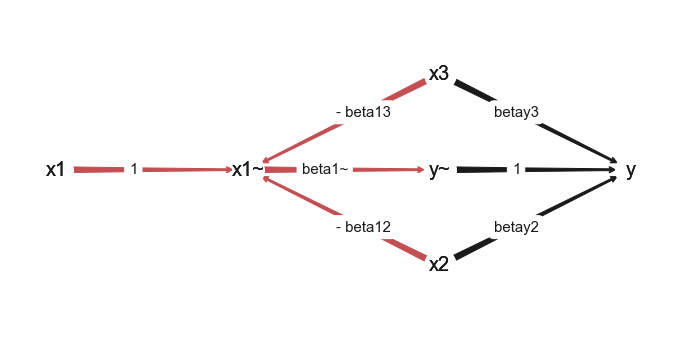

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.patch.set_facecolor('w')
pos = {'x1':[-4, 0], 'x1~':[-2, 0], 'y~':[0, 0], 'y':[2, 0],
       'x2':[0, -1], 'x3': [0, 1]}
red_edges = [('x2', 'x1~'), ('x3', 'x1~'), ('x1~', 'y~'), ('x1', 'x1~')]
black_edges = [edge for edge in G.edges() if edge not in red_edges]
nx.draw_networkx_edge_labels(G, pos, label_pos=0.6, ax=ax,
                             edge_labels=edge_labels, font_size=15, rotate=False)
nx.draw_networkx(G, pos, ax=ax, arrowstyle='fancy', edgelist=red_edges,
                 arrowsize=15, font_size=20, node_size=1000,
                 node_color='w', edge_color='r')
nx.draw_networkx(G, pos, ax=ax, arrowstyle='fancy', edgelist=black_edges,
                 arrowsize=15, font_size=20, node_size=1000, node_color='w')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())
ax.axis('equal');

So, if $x_1$ is omitted, the red path will be lost, which leads to the omitted variable bias.

However, if we let $x_2$ become a control variable, $x_3$ become the variable of interest and still let $x_1$ omitted, then

$$
E(\tilde{y}|x_2,x_3) = E(\tilde{y}|x_2).
$$

In this situation, $x_3$ cannot say anything about $\tilde{y}$ as long as we control $x_2$, so $\beta_{13} = 0$.

As a consequence, the approach from $x_3$ to $\tilde{y}$ will be cut off.

So, the omitted variable bias on $x_3$ will be removed and $\beta_{y3}$ will exactly take the same value as $\beta_3$.

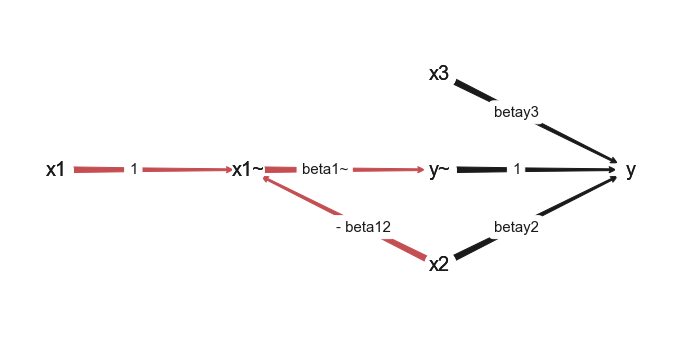

In [12]:
G.remove_edge('x3', 'x1~')
effects = ['1', 'beta1~', '- beta12', 'betay2', 'betay3', '1']
edge_labels = dict([(I, J) for (I, J) in zip(G.edges, effects)])
fig, ax = plt.subplots(figsize=(12, 6))
ax.patch.set_facecolor('w')
pos = {'x1':[-4, 0], 'x1~':[-2, 0], 'y~':[0, 0], 'y':[2, 0],
       'x2':[0, -1], 'x3': [0, 1]}
red_edges = [('x2', 'x1~'), ('x1~', 'y~'), ('x1', 'x1~')]
black_edges = [edge for edge in G.edges() if edge not in red_edges]
nx.draw_networkx_edge_labels(G, pos, label_pos=0.6, ax=ax,
                             edge_labels=edge_labels, font_size=15, rotate=False)
nx.draw_networkx(G, pos, ax=ax, arrowstyle='fancy', edgelist=red_edges,
                 arrowsize=15, font_size=20, node_size=1000,
                 node_color='w', edge_color='r')
nx.draw_networkx(G, pos, ax=ax, arrowstyle='fancy', edgelist=black_edges,
                 arrowsize=15, font_size=20, node_size=1000, node_color='w')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())
ax.axis('equal');

However, $x_2$ is still inconsistent because of the existence of the approach from $x_2$ to $\tilde{y}$.